<a href="https://colab.research.google.com/github/SunilKumarDasari/Hello/blob/master/ocrdeva1111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [26]:
!unzip /content/DevanagariHandwrittenCharacterDataset.zip

Streaming output truncated to the last 5000 lines.
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/104099.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/104101.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12716.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12723.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12724.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12725.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12726.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12727.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12731.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12732.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12735.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/13584.png  
 extracting: Devanagari

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#This is helpful in visualising matplotlib graphs
%matplotlib inline   
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras #The deep learning model we will use to train our dataset will make use of this
import tensorflow as tf
from PIL import Image as IMG #To read the image file
import os #To move through the folders and fetching the images
import matplotlib.pyplot as plt #To render Plots of our data
import sklearn.model_selection as smodel #To split the data for training and cross validation set

In [29]:
def countfile(root_dir):
    '''This function will move through all directory and 
    count the no. of images in our training set'''
    count = 0
    parent_folders = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]
    for characterfolder in parent_folders:
        if(os.path.isdir(characterfolder)):
            characterimage = [os.path.join(characterfolder,f) for f in os.listdir(characterfolder)]
            for image in characterimage:
                count += 1
    return count

In [30]:
def make_matrix(root_dir):
    '''This will make our feature matrix and label matrix used to train our model
    '''
    size = countfile(root_dir)
    X = np.zeros((size,32,32))
    Y = np.zeros((size,1),dtype='S140')
    Id = 0
    parent_folders = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]
    for characterfolder in parent_folders:
        if(characterfolder):
            print(characterfolder)
            characterimage = [os.path.join(characterfolder,f) for f in os.listdir(characterfolder)]
            for image in characterimage:
                I = np.array(IMG.open(image))#This will open the image and parse the data as it's pixel values
                X[Id] = I #Used to assign the pixel data for each image
                filepathTokens=image.split('/') 
                Y[Id,] = str(filepathTokens[-2].split('_')[-1])
                Id += 1
    return X,Y

In [31]:
rootdir = "DevanagariHandwrittenCharacterDataset/Train"  #This is our directory inside which all images are present in different subfolders.
X,Y = make_matrix(rootdir)

DevanagariHandwrittenCharacterDataset/Train/character_12_thaa
DevanagariHandwrittenCharacterDataset/Train/character_15_adna
DevanagariHandwrittenCharacterDataset/Train/character_6_cha
DevanagariHandwrittenCharacterDataset/Train/character_28_la
DevanagariHandwrittenCharacterDataset/Train/character_5_kna
DevanagariHandwrittenCharacterDataset/Train/character_20_na
DevanagariHandwrittenCharacterDataset/Train/character_3_ga
DevanagariHandwrittenCharacterDataset/Train/digit_5
DevanagariHandwrittenCharacterDataset/Train/character_4_gha
DevanagariHandwrittenCharacterDataset/Train/digit_0
DevanagariHandwrittenCharacterDataset/Train/character_27_ra
DevanagariHandwrittenCharacterDataset/Train/character_14_dhaa
DevanagariHandwrittenCharacterDataset/Train/character_16_tabala
DevanagariHandwrittenCharacterDataset/Train/character_18_da
DevanagariHandwrittenCharacterDataset/Train/character_9_jha
DevanagariHandwrittenCharacterDataset/Train/digit_4
DevanagariHandwrittenCharacterDataset/Train/digit_6
Dev

In [33]:
#This will make a dictionary with keys as the labels and value as the numeric label we want to assign to each string label
Yclass = {}
for i in range(len(np.unique(Y)[:])):
    Yclass[np.unique(Y)[i]] = i

In [34]:
def yvectorize(dict,data):
    '''This will assign the numeric label to each string label in the label matrix'''
    return dict[data]
vect = np.vectorize(yvectorize)
Y = vect(Yclass,Y)

In [36]:
x_train,x_test,y_train,y_test = smodel.train_test_split(X,Y,test_size=0.3) #This will split the matrix into train and cross validation matrix

Y shape (78200, 1)
X shape (78200, 32, 32)


Text(0.5, 0, "b'yna'")

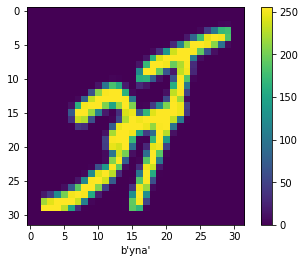

In [37]:
#to find the character name by it's label
def charactername(dic,label):
    for key, value in dic.items():    # for name, age in list.items():  (for Python 3.x)
        if(value == label):
            return (key)
print("Y shape",Y.shape)
print("X shape",X.shape)
#To print a random image and it's label from trainig set
rand = np.random.randint(1,100)
plt.figure()
plt.imshow(x_train[rand])
plt.colorbar()
plt.gca().grid(False)
plt.xlabel(charactername(Yclass,y_train[rand]))

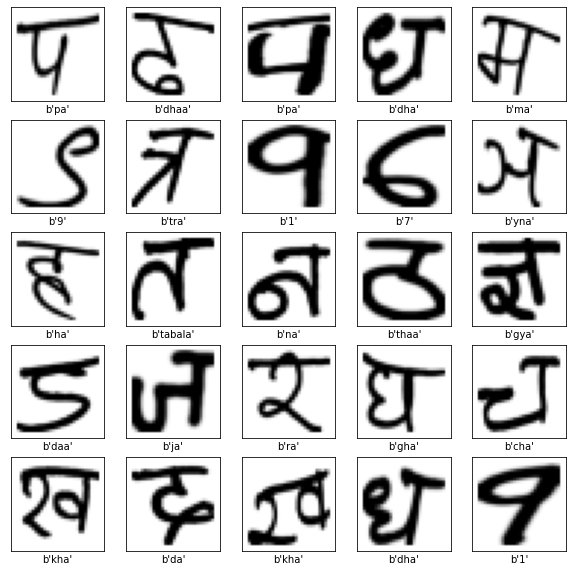

In [38]:
"""let's plot 25 random train set images """
plt.figure(figsize=(10,10))
rand = np.random.randint(1,1000,25)
for i in range(len(rand)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_train[rand[i]], cmap=plt.cm.binary)
    plt.xlabel(charactername(Yclass,y_train[rand[i]]))

In [55]:
#Let's normalise the feature matrix 
"""The value of feature matrix are in range 0 - 255"""
x_train = (x_train-np.mean(x_train))/np.std(x_train)
x_test = (x_test-np.mean(x_test))/np.std(x_test)

In [56]:
"""Let's train our model using three models ##first model has two layers only 
Second model has two layers with middle layer having 128 nodes
And third model has three layers with second layer having 256 nodes, Third layer with 128 nodes
Final layer in each model has 46 nodes as there are 36 alphabet and 10 digits in our data
We are doing this to find whether accuracy increases or decreases with addition of layers"""
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(46, activation=tf.nn.softmax)
])

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(46, activation=tf.nn.softmax)
])


model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(46, activation=tf.nn.softmax)
])
modellist = {'model1':model1,'model2':model2,'model3':model3}

In [70]:
"""Compiling our models"""
for k in modellist:
    modellist[k].compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
             

In [71]:
"""To note the value of epochs in corresponding model and train and test accuracy with that given model and epochs"""
epo = {'model1':[],'model2':[],'model3':[]}
trainacc = {'model1':[],'model2':[],'model3':[]}
testacc = {'model1':[],'model2':[],'model3':[]}
def trainandaccuracy(epochs,model,i):
    print("--"*20)
    print(i,epochs)
    model.fit(x_train,y_train, epochs=epochs)
    test_loss, test_acc = model.evaluate(x_test,y_test)
    train_loss, train_acc = model.evaluate(x_train,y_train)
    epo[i].append(epochs)
    trainacc[i].append(train_acc)
    testacc[i].append(test_acc)

In [72]:
"""To train models with epochs 500  with all the three model we have created"""
for i in modellist:
    trainandaccuracy(500,modellist[i],i)

----------------------------------------
model1 500
Epoch 1/500
1711/1711 [==============================] - 2s 1ms/step - loss: 1.3414 - accuracy: 0.6378
Epoch 2/500
1711/1711 [==============================] - 2s 1ms/step - loss: 1.0968 - accuracy: 0.7050
Epoch 3/500
1711/1711 [==============================] - 2s 1ms/step - loss: 1.0503 - accuracy: 0.7183
Epoch 4/500
1711/1711 [==============================] - 2s 1ms/step - loss: 1.0271 - accuracy: 0.7235
Epoch 5/500
1711/1711 [==============================] - 2s 1ms/step - loss: 1.0081 - accuracy: 0.7286
Epoch 6/500
1711/1711 [==============================] - 3s 2ms/step - loss: 0.9920 - accuracy: 0.7343
Epoch 7/500
1711/1711 [==============================] - 4s 2ms/step - loss: 0.9814 - accuracy: 0.7367
Epoch 8/500
1711/1711 [==============================] - 2s 1ms/step - loss: 0.9678 - accuracy: 0.7401
Epoch 9/500
1711/1711 [==============================] - 2s 1ms/step - loss: 0.9582 - accuracy: 0.7434
Epoch 10/500
1711/171

In [73]:
for m in trainacc:
    accuracy = float(trainacc[m][0])
    accuracy = round(accuracy*100,2)
    print("Accuracy for ",m,"is",accuracy,"%")

Accuracy for  model1 is 81.73 %
Accuracy for  model2 is 99.82 %
Accuracy for  model3 is 99.92 %


In [74]:
for m in testacc:
    accuracy = float(testacc[m][0])
    accuracy = round(accuracy*100,2)
    print("Accuracy for ",m,"is",accuracy,"%")

Accuracy for  model1 is 65.74 %
Accuracy for  model2 is 90.48 %
Accuracy for  model3 is 93.56 %
